In [1]:
import pandas as pd
import numpy as np
import prepdatamodel as pdm
from sklearn.linear_model import LinearRegression

Readig data

In [2]:
housing = pd.read_csv('housing.csv')

In [3]:
housing.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Split data to train and test

In [5]:
train_dataset = housing.sample(frac= 0.8, random_state= 0)
test_dataset = housing.drop(train_dataset.index)

Split data to features and labels

In [6]:
train_labels = train_dataset.pop('median_house_value')
test_labels = test_dataset.pop('median_house_value')

In [7]:
num_attributes = list(train_dataset.drop('ocean_proximity', axis = 1)) 
cat_attributes = ['ocean_proximity']

In [8]:
train_dataset_pr = pdm.pipeline(train_dataset, num_attributes, cat_attributes)
test_dataset_pr = pdm.pipeline(test_dataset, num_attributes, cat_attributes)

In [9]:
lin_reg = LinearRegression()
lin_reg.fit(train_dataset_pr, train_labels)

LinearRegression()

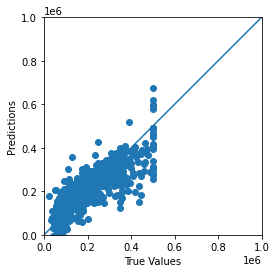

In [10]:
import matplotlib.pyplot as plt
test_predictions = lin_reg.predict(test_dataset_pr[:1000]).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels[:1000], test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [11]:
from sklearn.metrics import mean_squared_error

In [12]:
lin_mse = mean_squared_error(lin_reg.predict(test_dataset_pr), list(test_labels))
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67559.59533153786

In [13]:
from sklearn.tree import DecisionTreeRegressor

In [14]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_dataset_pr, train_labels)

DecisionTreeRegressor()

In [15]:
tree_mse = mean_squared_error(tree_reg.predict(test_dataset_pr), list(test_labels))
tree_rmse = np.sqrt(tree_mse)
tree_rmse

108763.35822576696

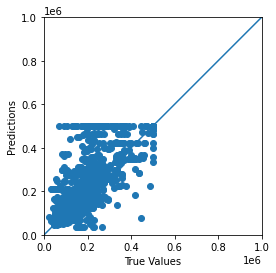

In [16]:
import matplotlib.pyplot as plt
test_predictions = tree_reg.predict(test_dataset_pr[:1000]).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels[:1000], test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
forest_reg = RandomForestRegressor()
forest_reg.fit(train_dataset_pr, train_labels)
forest_mse = mean_squared_error(forest_reg.predict(test_dataset_pr), list(test_labels))
forest_rmse = np.sqrt(forest_mse)
forest_rmse

77151.10783222648

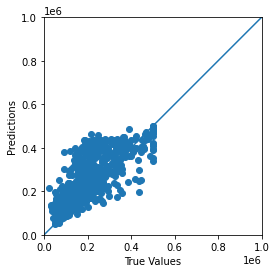

In [19]:
import matplotlib.pyplot as plt
test_predictions = forest_reg.predict(test_dataset_pr[:1000]).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels[:1000], test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [20]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
    scoring='neg_mean_squared_error',
    return_train_score=True)

In [21]:
grid_search.fit(train_dataset_pr, train_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

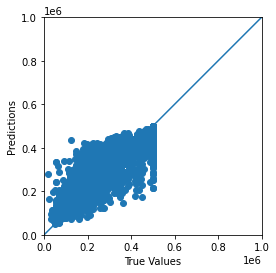

In [22]:
import matplotlib.pyplot as plt
test_predictions = grid_search.predict(test_dataset_pr).flatten()
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1000000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [23]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [24]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [25]:
grid_search_mse = mean_squared_error(grid_search.best_estimator_.predict(test_dataset_pr), list(test_labels))
grid_search_rmse = np.sqrt(grid_search_mse)
grid_search_rmse 

65663.42381191686